In [1]:
%matplotlib inline
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.cluster import KMeans
import folium
# Load data

In [2]:
#import requests
#
#url = "https://geo.fcc.gov/api/census/block/find"
#
#df = pd.DataFrame({"lat": [40.760659, 40.768254, 40.761573],
#                   "lon": [-73.980420, -73.988639, -73.972628],})
#df.assign(
#    block=df.apply(
#        lambda r: requests.get(
#            url, params={"latitude": r["lat"], "longitude": r["lon"], "format": "json"}
#        ).json()["Block"]["FIPS"],
#        axis=1,
#    )
#)

In [3]:
p2='C:/Users/dmckenzie/Downloads/00 PRDE School Data List_Jan-25-2022 V.1 (2).xlsx'
data=pd.read_excel(p2,sheet_name='Consolidated',header=1)

In [4]:
data['GT']=data['GRADES'].str.replace('EEE','').str.replace('EEI','').str.replace('EES','').str.replace('PK','').str.split().apply(' '.join)
lastelm=[]
for i in data['GT'].str.split():
    if len(i)<2:
        lastelm.append('')    
    else:
        lastelm.append(i[-1])
    
        
#data['Gfirst']=firstelm
data['Glast']=lastelm
data['GT2']=np.where(data['GT']=='','Missing',data['GT'])
firstelm=[]
for i in data['GT2'].str.split():
    firstelm.append(i[0])
    
data['Gfirst']=firstelm
data['Glast2']=np.where(data['Glast']=='','1000',data['Glast'])
data['Simp']=data['Gfirst']+" "+data['Glast2']
data['Simp2']=np.where((data['Glast2'].astype(int)<=5) | (data['Simp']=='K 1000'),'Elem',
            np.where((data['Glast2'].isin(['6','7','8','9'])) & 
                     (data['Gfirst'].isin(['K','1','2','3'])),
                     'Elem2Middle',
                    np.where((data['Simp']=='6 8') | 
                            (data['Simp']=='6 9')  |
                             (data['Simp']=='4 6') |
                             (data['Simp']=='4 8') |
                             (data['Simp']=='7 9') |
                             (data['Simp']=='6 7'),'Middle',
                            np.where((data['Glast2'].isin(['10','11','12'])) &
                                     (data['Gfirst'].isin(['5','6','7'])) ,
                                     'Middle2High',
                                    np.where((data['Glast2'].isin(['10','11','12'])) & 
                                     (data['Gfirst'].isin(['K','1','2','3','4'])),'Elem2High',
                                             np.where((data['Glast2'].isin(['10','11','12'])) &
                                                      (data['Gfirst'].isin(['8','9','10','11'])),
                                                      'High School',
                                                      np.where((data['Gfirst'].isin(['13','14','ADULTOS'])),
                                                      'Adult','Other')))))))
data['Simp2']=np.where(data['GT']=='','All Sped',data['Simp2'])

In [5]:
data=data[data['GRADES'].str.contains('|'.join(['9','10','11','12']))].reset_index(drop=True)

In [6]:
data=data.query("REGION=='CAGUAS'").reset_index(drop=True)

In [7]:
#data[data['Enrollment 2022-23'].astype(float)<=800]

In [8]:
data.columns=data.columns.str.lower().str.capitalize()

In [9]:
data

,Week 1 schedule.survey map creatd,Status (formula do not type),Survey date,Special \nconsideration,Team,Survey completed / team,Trip,Dlr team,Targeted assessment date,Disctrict priority,...,Column1,Column2,Column3,Gt,Glast,Gt2,Gfirst,Glast2,Simp,Simp2
0,2022-02-24 00:00:00,Completed,2022-03-07,NaN,Team D,2022-03-07,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D20735@de.pr.gov,K 1 2 3 4 5 6 7 8 9,9,K 1 2 3 4 5 6 7 8 9,K,9,K 9,Elem2Middle
1,2022-02-24 00:00:00,Completed,2022-03-08,NaN,Team D,2022-03-08,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D20800@de.pr.gov,9 10 11 12,12,9 10 11 12,9,12,9 12,High School
2,2022-02-16 00:00:00,Completed,2022-03-10,Priority,Team D,2022-03-10,TRIP 2,TEAM D (9 DAYS),NaN,N01,...,NaN,NaN,D20982@de.pr.gov de116524@miescuela.pr,9 10 11 12,12,9 10 11 12,9,12,9 12,High School
3,2022-02-24 00:00:00,Completed,2022-03-10,NaN,Team D,2022-03-10,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D21055@de.pr.gov,9 10 11 12,12,9 10 11 12,9,12,9 12,High School
4,2022-02-24 00:00:00,Completed,2022-03-08,NaN,Team D,2022-03-08,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D23598@de.pr.gov,6 7 8 9 10 11,11,6 7 8 9 10 11,6,11,6 11,Middle2High
5,2022-02-24 00:00:00,Completed,2022-03-03,NaN,Team D,2022-03-03,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D25601@de.pr.gov,9 10 11 12,12,9 10 11 12,9,12,9 12,High School
6,2022-02-24 00:00:00,Completed,2022-03-09,NaN,Team D,2022-03-09,TRIP 2,TEAM D (9 DAYS),NaN,S10,...,NaN,NaN,D26492@de.pr.gov,6 7 8 9 10 11,11,6 7 8 9 10 11,6,11,6 11,Middle2High
7,2022-02-24 00:00:00,Completed,2022-02-28,NaN,Team E,2022-02-28,TRIP 2,TEAM E (9 DAYS),NaN,S10,...,NaN,NaN,D20719@de.pr.gov,K 1 2 3 4 5 6 7 8 9,9,K 1 2 3 4 5 6 7 8 9,K,9,K 9,Elem2Middle
8,2022-02-24 00:00:00,Completed,2022-03-04,NaN,Team E,2022-03-04,TRIP 2,TEAM E (9 DAYS),NaN,S10,...,NaN,NaN,D26773@de.pr.gov,9 10 11 12,12,9 10 11 12,9,12,9 12,High School
9,2022-02-24 00:00:00,Completed,2022-03-09,NaN,Team F,2022-03-09,TRIP 2,TEAM F (9 DAYS),NaN,S10,...,NaN,NaN,D20172@de.pr.gov,K 1 2 3 4 5 6 7 8 9,9,K 1 2 3 4 5 6 7 8 9,K,9,K 9,Elem2Middle


In [10]:
len(data['Municipality'].value_counts())

11

In [11]:
m = folium.Map(location=data[['Latitude', 'Longitude']].mean(),
               fit_bounds=[[data['Latitude'].min(),
                            data['Longitude'].min()], 
                           [data['Latitude'].max(),
                            data['Longitude'].max()]])


In [12]:
m

In [13]:
#folium.Marker(location = coordinates,
#                            popup =
#                            "Year: " + str(geo_df.Year[i]) + '<br>' +
#                            "Name: " + str(geo_df.Name[i]) + '<br>' +
#                            "Country: " + str(geo_df.Country[i]) + '<br>'
#                            "Type: " + str(geo_df.Type[i]) + '<br>'
#                            "Coordinates: " + str(geo_df_list[i]),
#                            icon = folium.Icon(color = "%s" % type_color))

In [14]:
data['SheltersNum']=np.where(data['Shelters'].isna(),0,1)
data['FaastNum']=np.where(data['Faast'].isna(),0,1)
data['21st century schoolNum']=np.where(data['21st century school'].isna(),0,1)

In [15]:
data['SpEd']=data['Grades'].str.contains("E")*1

In [16]:
data['PK']=data['Grades'].str.contains("PK")*1

In [17]:
data['PriorityNum']=data['SheltersNum']+data['FaastNum']+data['21st century schoolNum']

In [18]:
data['Shelters']=np.where(data['Shelters'].isna(),'No','Yes')
data['Faast']=np.where(data['Faast'].isna(),'No','Yes')
data['21st century school']=np.where(data['21st century school'].isna(),'No','Yes')

In [19]:
from folium import FeatureGroup, LayerControl


In [20]:
from scipy.spatial.distance import cdist

from haversine import haversine, Unit
def hav2(a,b):
    return haversine(a,b,unit='mi')


In [21]:
data=data.reset_index(drop=True)

In [22]:
loclist=[]
for i,j in data[['Latitude','Longitude']].iterrows():
    loclist.append(j[['Latitude','Longitude']].tolist())

In [23]:
adjmat=cdist(loclist, loclist, metric=hav2)

In [24]:
count=0
FriendFrame=pd.DataFrame()
for i in adjmat:
    friendsDEX=pd.Series(i)[pd.Series(i)<=5].index.values
    Temp=pd.DataFrame({'FriendCode':data.iloc[friendsDEX,:]['Code']}).assign(SchoolCode=data.iloc[count,:]['Code'])
    FriendFrame=FriendFrame.append(Temp)
    count+=1
FriendFrame=FriendFrame[FriendFrame['FriendCode']!=FriendFrame['SchoolCode']]


In [25]:
FriendFrame['Smin']=FriendFrame.min(axis=1)
FriendFrame['Smax']=FriendFrame.max(axis=1)

In [26]:
FriendFrame=FriendFrame.drop_duplicates(['Smin','Smax'])

In [27]:
FriendFrame

,FriendCode,SchoolCode,Smin,Smax
1,20800,20735,20735,20800
2,20982,20735,20735,20982
3,21055,20735,20735,21055
4,23598,20735,20735,23598
5,25601,20735,20735,25601
...,...,...,...,...
35,28563,24810,24810,28563
36,36053,24810,24810,36053
35,28563,26336,26336,28563
37,56820,28373,28373,56820


In [28]:
FriendNet=FriendFrame.\
    set_index('FriendCode').\
    join(data.\
             set_index('Code')[['Latitude','Longitude','Municipality']].\
             rename(columns={'Latitude':'LatFriend',
                            'Longitude':'LongFriend'})).\
    reset_index().set_index('SchoolCode').join(data.\
             set_index('Code')[['Latitude','Longitude','Municipality']].\
             rename(columns={'Latitude':'LatMain',
                            'Longitude':'LongMain',
                            'Municipality':'M2'})).reset_index().reset_index(drop=True).rename(columns={"index":'FriendCode',
                                                                                                       "level_0":"SchoolCode"})

In [29]:
FriendNet

,SchoolCode,FriendCode,Smin,Smax,LatFriend,LongFriend,Municipality,LatMain,LongMain,M2
0,20172,20180,20172,20180,18.223383,-66.131010,AGUAS BUENAS,18.236880,-66.162170,AGUAS BUENAS
1,20172,21550,20172,21550,18.174380,-66.159100,CIDRA,18.236880,-66.162170,AGUAS BUENAS
2,20172,21576,20172,21576,18.178550,-66.159720,CIDRA,18.236880,-66.162170,AGUAS BUENAS
3,20172,21758,20172,21758,18.223550,-66.218700,COMERIO,18.236880,-66.162170,AGUAS BUENAS
4,20172,21832,20172,21832,18.214580,-66.228770,COMERIO,18.236880,-66.162170,AGUAS BUENAS
...,...,...,...,...,...,...,...,...,...,...
128,27540,23440,23440,27540,18.237294,-66.029332,CAGUAS,18.252660,-66.101440,AGUAS BUENAS
129,27540,28571,27540,28571,18.257231,-66.091892,AGUAS BUENAS,18.252660,-66.101440,AGUAS BUENAS
130,28373,56820,28373,56820,17.973100,-66.296470,SALINAS,17.973230,-66.281680,SALINAS
131,28563,36053,28563,36053,17.974480,-66.069150,ARROYO,17.971587,-66.096072,GUAYAMA


In [30]:
#for i in FriendNet['Smin']:
#    friends(FriendNet[FriendNet['Smin']==i]

In [31]:
len(data)

39

In [32]:
dists=[]
durs=[]
import requests
import json

for i in FriendNet.index:
    latfriend=FriendNet.iloc[i,:]['LatFriend']
    lonfriend=FriendNet.iloc[i,:]['LongFriend']
    latmain=FriendNet.iloc[i,:]['LatMain']
    lonmain=FriendNet.iloc[i,:]['LongMain']
    r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lonmain},{latmain};{lonfriend},{latfriend}?overview=false""")
    routes = json.loads(r.content)
    dist=routes['routes'][0]['distance']
    dur=routes['routes'][0]['duration']
    durs.append(dur)
    dists.append(dist)

    
FriendNet['DriveDist']=dists
FriendNet['DriveDur']=durs

In [33]:
FriendNet['DriveMiles']=FriendNet['DriveDist']/1609.344
FriendNet=FriendNet.query('DriveMiles<=5').reset_index(drop=True)

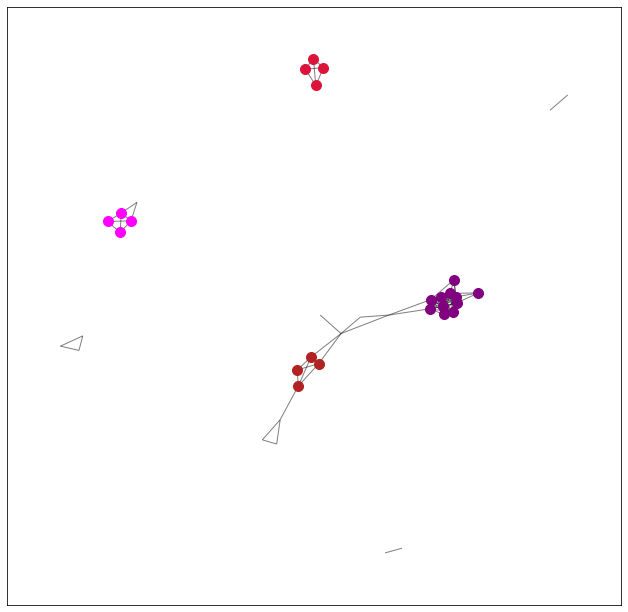

In [34]:
AllNodes=FriendNet['FriendCode'].append(FriendNet['SchoolCode']).drop_duplicates().reset_index(drop=True)
import networkx as nx
from networkx.algorithms.community import k_clique_communities
G = nx.from_pandas_edgelist(FriendNet, "SchoolCode",'FriendCode')
pos = nx.spring_layout(G)
# Drawing the graph

import networkx as nx
from networkx.algorithms.community import k_clique_communities
G = nx.from_pandas_edgelist(FriendNet, "SchoolCode",'FriendCode')

import matplotlib.colors as mcolors
mcolors.CSS4_COLORS
allcolors=list(mcolors.CSS4_COLORS.keys())

plt.figure(figsize=(11, 11))
for i in list(k_clique_communities(G, 4)):
    nx.draw_networkx_nodes(G, pos, nodelist=list(i), node_color=str(np.random.choice(allcolors)),node_size=100)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)    

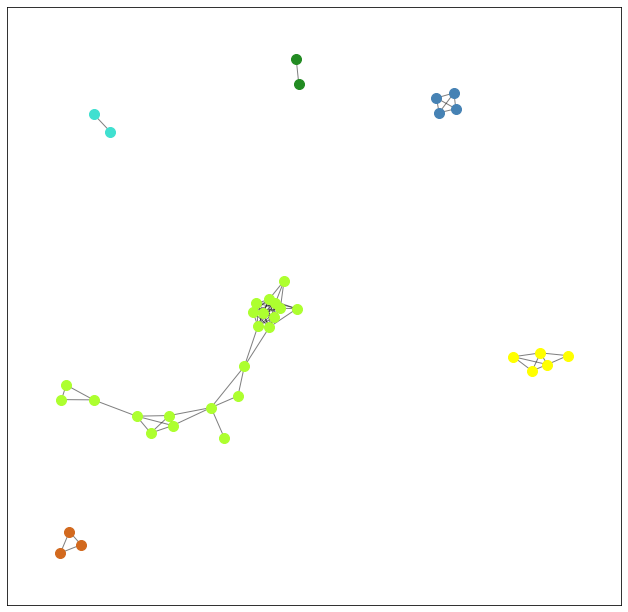

In [35]:
AllNodes=FriendNet['FriendCode'].append(FriendNet['SchoolCode']).drop_duplicates().reset_index(drop=True)
import networkx as nx
from networkx.algorithms.community import k_clique_communities
G = nx.from_pandas_edgelist(FriendNet, "SchoolCode",'FriendCode')
pos = nx.spring_layout(G)
# Drawing the graph

import networkx as nx
from networkx.algorithms.community import k_clique_communities
G = nx.from_pandas_edgelist(FriendNet, "SchoolCode",'FriendCode')

import matplotlib.colors as mcolors
mcolors.CSS4_COLORS
allcolors=list(mcolors.CSS4_COLORS.keys())

plt.figure(figsize=(11, 11))
for i in list(k_clique_communities(G, 2)):
    nx.draw_networkx_nodes(G, pos, nodelist=list(i), node_color=str(np.random.choice(allcolors)),node_size=100)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)    

In [36]:
ab=[]
for i in list(k_clique_communities(G, 2)):
    ab.append(list(i))    
nicename={}
for i in list(range(0,len(ab))):
    nicename.update({i:ab[i]})
    
kcliquelabels=[]
for i in AllNodes:
    for j in nicename.keys():
        if i in nicename[j]:
            kcliquelabels.append(j)    
degreedf=pd.DataFrame()
for i,j in list(G.degree):
    degreedf=degreedf.append(pd.DataFrame({'SchoolCode':[i],'Connections':[j]}))   
NetworkData=pd.DataFrame({'SchoolCode':AllNodes,'NetworkID':kcliquelabels})  
NetworkData=NetworkData.sort_values('NetworkID').reset_index(drop=True)
NetworkData['NetworkSize']=NetworkData.groupby('NetworkID').transform('count')
NetworkData=NetworkData.\
    set_index('SchoolCode').\
    join(degreedf.set_index('SchoolCode')).\
    reset_index().\
    assign(SchoolConnectionRatio=lambda x: round(x.Connections/x.NetworkSize,2))
data=data.set_index('Code').join(NetworkData.set_index('SchoolCode')).reset_index()

In [37]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [38]:
data[data['Enrollment 2022-23']!=('NOT IN ENROLLMENT')]['Enrollment 2022-23'].median()

361.96655993733464

In [39]:
data['ImpEnroll']=data['Enrollment 2022-23'].astype(str).str.replace('NOT IN ENROLLMENT',str(data[data['Enrollment 2022-23']!=('NOT IN ENROLLMENT')]['Enrollment 2022-23'].median())).astype(float)

In [40]:
data['Latw']=data['ImpEnroll']*data['Latitude']
data['Longw']=data['ImpEnroll']*data['Longitude']

In [41]:
data['SchoolLevel']=np.where(data.Grades.str.contains('|'.join(['9','10','11','12'])),'HS','ELEM')

In [42]:
data['Priority']=(data['Shelters']+data['Faast']+data['21st century school']).str.contains('Y')*1

In [43]:

Centers=data.groupby(['Region','Municipality']).\
    agg({'ImpEnroll':['sum'],
         'Latw':['sum'],
         'Longw':['sum']}).\
    reset_index().\
    assign(CenterLong=lambda x:x.Longw/x.ImpEnroll,
          CenterLat=lambda x:x.Latw/x.ImpEnroll)

Centers.columns=Centers.columns.map(''.join)
data=data.\
    set_index(['Region','Municipality']).\
    join(Centers[['CenterLong','CenterLat','Region','Municipality']].set_index(['Region','Municipality'])).\
    reset_index()

In [44]:
dists=[]
for i,row in data.iterrows():
    dists.append(haversine(row['Longitude'], row['Latitude'], row['CenterLong'], row['CenterLat']))

In [45]:
data['Miles From Center']=dists

In [46]:
data=data.set_index('NetworkID').join(data.groupby(['NetworkID'])['Enrollment 2022-23'].sum().reset_index().\
                                     rename(columns={'Enrollment 2022-23':'NetworkEnrollmentTotal'}).set_index('NetworkID')).reset_index()

In [47]:

feature_group = FeatureGroup(name='Priority School')
feature_group2 = FeatureGroup(name='Non Priority School')
m = folium.Map(location=data[['Latitude', 'Longitude']].mean(),
               fit_bounds=[[data['Latitude'].min(),
                            data['Longitude'].min()], 
                           [data['Latitude'].max(),
                            data['Longitude'].max()]])


In [48]:
m

In [49]:
import geopandas as gpd
Municiplaities = FeatureGroup(name='Regions')
url = "C:/Users/dmckenzie/Downloads/municipalities.geojson"
df = gpd.read_file(url)
df['NAME']=df['NAME'].str.replace('á','a').\
    str.replace('í','i').\
    str.replace('ó','o').\
    str.replace('ü','u').\
    str.lower()
data['Municipality2']=data['Municipality'].str.lower()
df=df.set_index('NAME').join(data.drop_duplicates(subset=['Municipality2']).set_index('Municipality2')['Region']).reset_index()
df=df.dissolve(by='Region')
folium.Choropleth(geo_data=df,fill_color='green',fill_opacity=0.001,).add_to(Municiplaities)
m.add_child(Municiplaities)  


In [50]:
feature_group3 = FeatureGroup(name='Center Of Gravity')
for _, row in Centers.iterrows():
    pin=folium.CircleMarker(location=[row['CenterLat'], 
                                  row['CenterLong']],
                        radius=20,
    color="#3186cc",
    fill=True,
    fill_color="#3186cc").\
    add_to(feature_group3)
m.add_child(feature_group3)
feature_group4 = FeatureGroup(name='Center Of Gravity Network')
# Add flow lines to centers of gravity to map
for _, row in data.iterrows():
    # Flow lines
    folium.PolyLine([(row['Latitude'],
                          row['Longitude']),
                         (row['CenterLat'],
                          row['CenterLong'])],
                        color='blue',
                        opacity=0.8).add_to(feature_group4)
m.add_child(feature_group4)    

In [51]:
#for _, row in data.iterrows():
#    print(str(np.where(row['Simp2']=='High School','green',
#                      np.where(row['Simp2']=='Middle','yellow',
#                              np.where(row['Simp2']=='Elem2Middle','purple',
#                                      np.where(row['Simp2']=='Elem','blue','orange'))))))

In [52]:
m2=m

In [53]:
data['Simp2'].value_counts()

High School    23
Middle2High     7
Elem2Middle     5
Elem2High       3
Middle          1
Name: Simp2, dtype: int64

In [54]:
# Add volume points
for _, row in data.iterrows():
    pin=folium.Marker(location=[row['Latitude'], 
                                  row['Longitude']],
                        radius=25,
                        icon=folium.Icon(color=str(np.where(row['Simp2']=='Middle','red',
                                                    np.where(row['Simp2']=='Middle2High','orange',        
                              np.where(row['Simp2']=='Elem2Middle','green',
                              np.where(row['Simp2']=='Elem2High','blue',         
                                      np.where(row['Simp2']=='High School','pink',
                                               'purple')))))), 
                                         icon=str(np.where(row['Priority']==1,'thumbs-up','thumbs-down'))),
                  popup=
                '<table style="height: 100px; width: 300px;">'+
                  "<tr>"+
                      '<th style="width: 120px;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Region </span>'+'</th>' + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+""+str(row['Region']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120px;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Municipality</span>'+'</th>' + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+""+str(row['Municipality']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120px;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">School Code </span>'+'</th>' + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+""+str(row['Code']) + '</td>' +
                  "</tr>"+
                      
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">School Name </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['School name']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Grades </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Grades']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Zone </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Zone']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Year Built </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Year built']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Sf/student</span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Sf/student']) + '</td>' +
                  "</tr>"+  
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">No of classrooms</span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['No of classrooms']) + '</td>' +
                  "</tr>"+      
                  "<tr>"+
                      '<th style="width: 120px;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">FAAST School? </span>'+'</th>' + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Faast']) + '</td>' +
                  "</tr>"+
                  "<tr>"+
                      '<th style="width: 120px;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Shelter? </span>'+'</th>' + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+" "+str(row['Shelters']) + '</td>' +
                  "</tr>"+    
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">21st Century School? </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['21st century school']) + '</td>' +
                  "</tr>" +
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Miles From Center </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['Miles From Center']) + '</td>' +
                  "</tr>" + 
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Enrollment 22-23 </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['Enrollment 2022-23']) + '</td>' +
                  "</tr>" +
                  
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">NetworkID </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['NetworkID']) + '</td>' +
                  "</tr>" +
                      
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">Network Size </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['NetworkSize']) + '</td>' +
                  "</tr>" + 
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;"># School Connections </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['Connections']) + '</td>' +
                  "</tr>" +
                  "<tr>"+
                      '<th style="width: 120;background-color:#19a7bd;border: 2px solid black;padding: 4px;">'+'<span style="color: #ffffff;">SchoolConnectionRatio </span>'+"</th>" + 
                      '<td style="width: 150px;background-color:#f2f0d3;border: 2px solid black;padding: 4px;">'+str(row['SchoolConnectionRatio']) + '</td>' +
                  "</tr>"    
                  "</table>"
                  
                 )
    if row['Priority']==1:
        feature_group.add_child(pin)
    else:    
        feature_group2.add_child(pin)

        


m2.add_child(feature_group)
m2.add_child(feature_group2)
# turn on layer control
#m.add_child(folium.map.LayerControl())    
    
#m    

In [55]:
data.drop_duplicates(subset=['Municipality2']).set_index('Municipality2')['Region']

Municipality2
aguas buenas    CAGUAS
caguas          CAGUAS
cayey           CAGUAS
cidra           CAGUAS
gurabo          CAGUAS
aibonito        CAGUAS
arroyo          CAGUAS
guayama         CAGUAS
barranquitas    CAGUAS
comerio         CAGUAS
salinas         CAGUAS
Name: Region, dtype: object

In [56]:
feature_group5 = FeatureGroup(name='Neighbor Network')
# Add flow lines to centers of gravity to map
for _, row in FriendNet.reset_index(drop=True).iterrows():
    # Flow lines
    folium.PolyLine([(row['LatMain'],
                          row['LongMain']),
                         (row['LatFriend'],
                          row['LongFriend'])],
                        color='black',
                        opacity=0.8).add_to(feature_group5)
m2.add_child(feature_group5)    

In [57]:
m2.add_child(folium.map.LayerControl())    
    
m2    

In [58]:
m2

In [59]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Caguas Schools Serving Grade 9 or Higher</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Middle School</li>
    <li><span style='background:forestgreen;opacity:0.7;'></span>Elementary + Middle</li>
    <li><span style='background:darkorange;opacity:0.7;'></span>Middle + High</li>
    <li><span style='background:steelblue;opacity:0.7;'></span>Elementary + High</li>
    <li><span style='background:hotpink;opacity:0.7;'></span>High School</li>
    <li><span style='background:black;opacity:0.7;'></span>Black Line = 5 Mile or Less Drive Between Points</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m2.get_root().add_child(macro)

m2

In [60]:
m2.save('CaguasHSAndMoreMap.html')

In [61]:
path="C:/Users\dmckenzie\OneDrive - DLR Group\Desktop"+"\enrollmentbreakdown.csv"
Breakdown=pd.read_csv(path)
columns=pd.read_csv(path).columns.str.contains('2022-23')
Breakdown=pd.concat([pd.DataFrame(Breakdown.iloc[:,3]),Breakdown.iloc[:,columns]],axis=1)
NetLevelSums=Breakdown.\
    set_index('CODIGO').\
    join(data[['NetworkID','Code']].\
             assign(Code=data['Code'].astype(str)).\
         set_index('Code')).\
    groupby('NetworkID').sum()
NetLevelSums.columns="Network Total "+NetLevelSums.columns
data2=data[['NetworkID','Region','Municipality','Code','School name','Grades','Sf/student','Floor area (sf)',
      'Faast','Shelters','21st century school','Miles From Center',
      'Enrollment 2022-23','NetworkEnrollmentTotal',
      'NetworkSize','Connections','SchoolConnectionRatio']].\
    assign(Code=data['Code'].astype(str)).\
    set_index('Code').\
    join(Breakdown.\
        set_index('CODIGO')).\
    reset_index().\
    set_index('NetworkID').\
    join(NetLevelSums).\
    reset_index()
data2.to_csv('CaguasHSAndMoreNetHelper.csv')